# Machine Learning Mini Project - Movie Recommender System
---

## Phase 1: Introduction and Preliminary Analysis
---

### Objective
The project's main goals include:
- using data to gain insights on users' watching habits and similarities between various movies
- using collaborative filtering to make accurate movie recommendations for a user
- building a simple app where users can search for movies and receive recommendations
---

### Data Source
The dataset **ml-latest-small** describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. The data was created by 610 users between March 29, 1996 and September 24, 2018.

Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Users are represented by anonymized ids, and no other information is provided.

---

### Tech Stack
- Python: scikit-learn, pandas, matplotlib, streamlit, sqlite3
- API: FastAPI
---

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Reading the data

In [2]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Size of Data

In [5]:
print("Size of Movies Dataset = ", movies.shape)
print("Size of Ratings Dataset  = ", ratings.shape)

Size of Movies Dataset =  (9742, 3)
Size of Ratings Dataset  =  (100836, 4)


### Information about columns

In [6]:
print(movies.info())
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None


### Checking for missing values

In [7]:
print("Movies Dataset Missing Values : ")
print(movies.isna().sum())
print("\nRatings Dataset Missing Values : ")
print(ratings.isna().sum())

Movies Dataset Missing Values : 
movieId    0
title      0
genres     0
dtype: int64

Ratings Dataset Missing Values : 
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


#### No null values in the dataset

### Checking for outliers in ratings

In [8]:
print(ratings.rating.describe())

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


### Taking count of movies per genre

In [9]:
movies['genres'] = movies['genres'].str.replace('|', ' ')
genre = pd.DataFrame(movies.genres.str.split(' ').tolist())
genrecounts = genre.stack().value_counts()
genrecounts

/tmp/ipykernel_1759476/4058141363.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies['genres'] = movies['genres'].str.replace('|', ' ')


Drama          4361
Comedy         3756
Thriller       1894
Action         1828
Romance        1596
Adventure      1263
Crime          1199
Sci-Fi          980
Horror          978
Fantasy         779
Children        664
Animation       611
Mystery         573
Documentary     440
War             382
Musical         334
Western         167
IMAX            158
Film-Noir        87
(no              34
genres           34
listed)          34
dtype: int64

### Combining the datasets and creating dummy variables for genre

In [10]:
data = pd.merge(movies, ratings, on='movieId')
data = pd.concat([data.drop('genres', axis=1), data.genres.str.get_dummies(sep=' ')], axis=1)
data.head()

,movieId,title,userId,rating,timestamp,(no,Action,Adventure,Animation,Children,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genres,listed)
0,1,Toy Story (1995),1,4.0,964982703,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),5,4.0,847434962,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),7,4.5,1106635946,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),15,2.5,1510577970,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),17,4.5,1305696483,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


### Finding average rating per movie

In [11]:
genrelist = genre.stack().unique().tolist()
meanratings = []


print("Average rating by genre: \n")
for genre in genrelist:
    meanrating = data.groupby(genre)['rating'].mean()[1]
    meanratings.append(meanrating)
    print(genre + ": " + str(meanrating))
    
print("\nOverall average rating: ", sum(meanratings)/len(meanratings))

Average rating by genre: 

Adventure: 3.5086089151939075
Animation: 3.6299370349170004
Children: 3.412956125108601
Comedy: 3.3847207640898267
Fantasy: 3.4910005070136894
Romance: 3.5065107040388437
Drama: 3.6561844113718758
Action: 3.447984331646809
Crime: 3.658293867274144
Thriller: 3.4937055799183425
Horror: 3.258195034974626
Mystery: 3.632460255407871
Sci-Fi: 3.455721162210752
War: 3.8082938876312
Musical: 3.5636781053649105
Documentary: 3.797785069729286
IMAX: 3.618335343787696
Western: 3.583937823834197
Film-Noir: 3.920114942528736
(no: 3.4893617021276597
genres: 3.4893617021276597
listed): 3.4893617021276597

Overall average rating:  3.5589322260193317


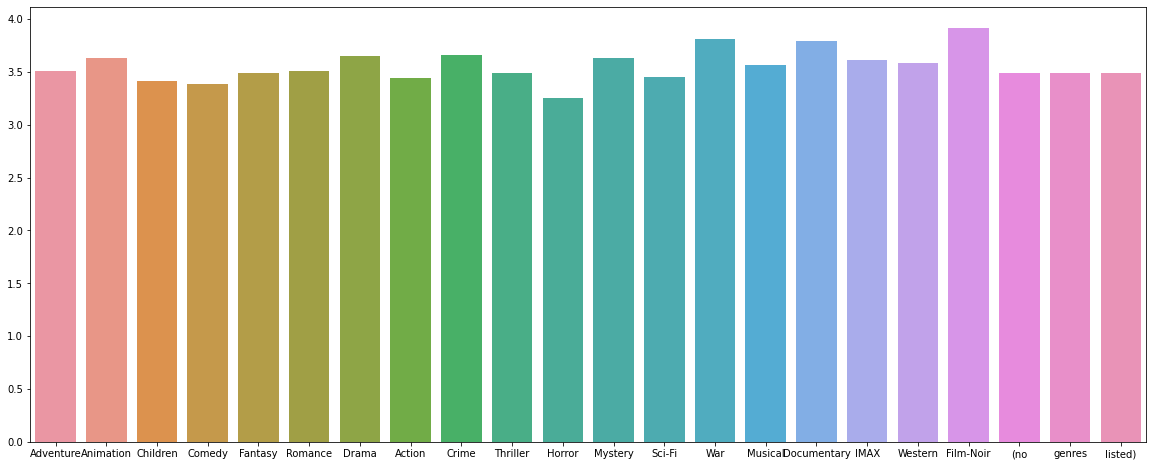

In [12]:
plt.figure(figsize=(20,8))
fig = sns.barplot(x=genrelist, y=meanratings)

## Ratings by Genre

In [23]:
x = ratings.groupby('userId').movieId.count()
y = ratings.groupby('userId').rating.mean()
rating_new = pd.merge(left=x, right=y, on='userId')
rating_new.sort_values('movieId', ascending=False)

,movieId,rating
userId,,
414,2698,3.391957
599,2478,2.642050
474,2108,3.398956
448,1864,2.847371
274,1346,3.235884
...,...,...
442,20,1.275000
569,20,4.000000
320,20,3.525000


#### User 414 has rated the most movies with an average rating of 3.39
#### User 53 has rated the least movies with an average rating of 5

## Ratings by Title

In [25]:
X = data.groupby('title').rating.count()
Y = data.groupby('title').rating.mean()
rating_title = pd.DataFrame(data=X)
rating_title['ratingAvg'] = pd.DataFrame(Y)
rating_title.sort_values('rating', ascending=False)

,rating,ratingAvg
title,,
Forrest Gump (1994),329,4.164134
"Shawshank Redemption, The (1994)",317,4.429022
Pulp Fiction (1994),307,4.197068
"Silence of the Lambs, The (1991)",279,4.161290
"Matrix, The (1999)",278,4.192446
...,...,...
King Solomon's Mines (1950),1,3.000000
King Solomon's Mines (1937),1,2.500000
King Ralph (1991),1,1.500000


#### Here we see that Forest Gump has the most number of ratings with average rating of 4.16
#### and À nous la liberté (Freedom for Us) has least number of ratings with an average rating of 1.00

## Movies released per year

In [13]:
data['year'] = data['title'].str.extract('.*\((.*)\).*', expand=False)
data.head()

,movieId,title,userId,rating,timestamp,(no,Action,Adventure,Animation,Children,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genres,listed),year
0,1,Toy Story (1995),1,4.0,964982703,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1995
1,1,Toy Story (1995),5,4.0,847434962,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1995
2,1,Toy Story (1995),7,4.5,1106635946,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1995
3,1,Toy Story (1995),15,2.5,1510577970,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1995
4,1,Toy Story (1995),17,4.5,1305696483,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1995


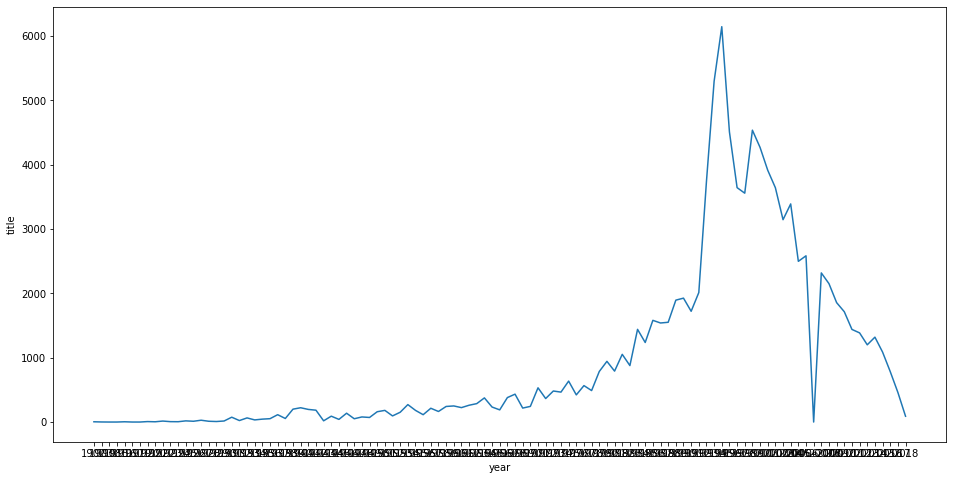

In [14]:
years = data.groupby('year').count()['title']
plt.figure(figsize=(16,8))
fig = sns.lineplot(x=years.index, y=years)
plt.show()

In [15]:
years.describe()

count     107.000000
mean      942.233645
std      1342.584810
min         1.000000
25%        60.500000
50%       251.000000
75%      1413.000000
max      6144.000000
Name: title, dtype: float64

#### On an average 942 movies are released every year

In [20]:
columns = data.columns
columns

Index(['movieId', 'title', 'userId', 'rating', 'timestamp', '(no', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'genres', 'listed)',
       'year'],
      dtype='object')

<AxesSubplot:>

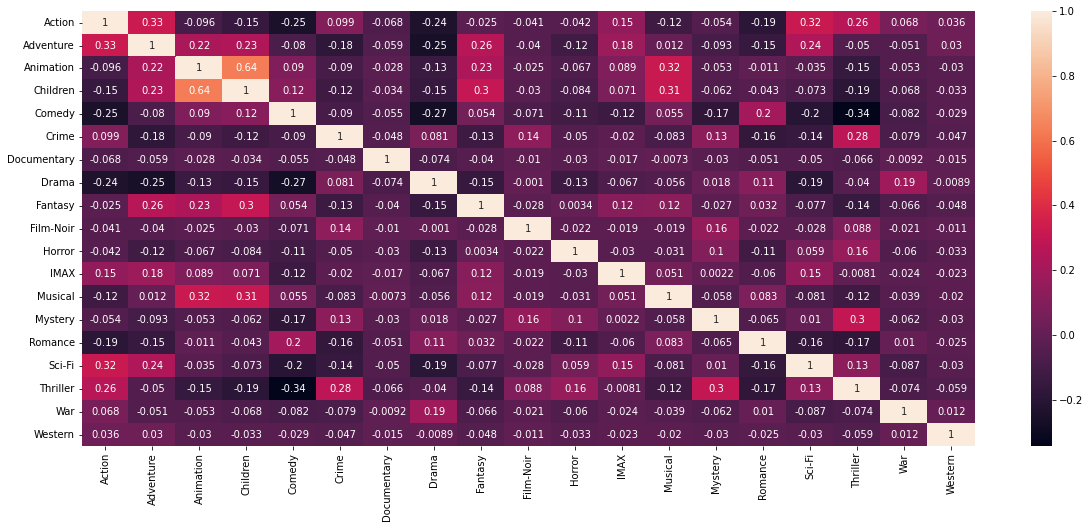

In [21]:
plt.figure(figsize=(20,8))
corrmat = data[data.columns[6:25]].corr()
sns.heatmap(corrmat, annot=True)

### A positive correlation is found between genres some of which are :<br>
- Animation, Children
- Action, Adventure